## Optimization example: Linear regression

In this example, we will solve a linear regression problem three different ways.

Before we start, we need to define the `mean_square_error` objective function, and provide the "data" matrix $X$ and the "outcome" vector $y$.

In [1]:
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import scipy.optimize as opt


def mean_square_error(X,y,beta):
    mse = np.linalg.norm((X @ beta) - y) **2
    return mse

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([7,8,9])

mse_for_this_problem = lambda beta: mean_square_error(X,y,beta) # define a specific version of the mean_square_error function that uses X and y

First, we will minimize the objective function numerically, using `scipy.optimize.minimize`.

In [2]:
reg_scipy = opt.minimize(mse_for_this_problem, np.zeros(2)).x #provide an initial guess of beta = [0,0]
print(reg_scipy)

[-5.99999985  6.49999987]


Next, we will solve the problem analytically, using the closed form solution.

In [3]:
reg_inv = np.linalg.inv(X.T @ X) @ X.T @ y # this is the analytical solution
reg_solve = np.linalg.solve(X.T @ X, X.T @ y) # this is also the analytical solution, but should be faster than using the inverse.

In [4]:
print(f"reg_inv = {reg_inv}") # notice that they give the same answer
print(f"beta_hat3 = {reg_solve}")  # The time difference won't be noticeable for small matrices like this one, but it will be substantial when you have more data

reg_inv = [-6.   6.5]
beta_hat3 = [-6.   6.5]


Finally, we'll solve the same problem using scikit-learn and statsmodels. 

In [5]:
# Using sklearn.linear_model
reg_sklearn = linear_model.LinearRegression(fit_intercept=False)
reg_sklearn.fit(X, y)
beta_hat_sklearn = reg_sklearn.coef_
print(f"beta_hat_sklearn = {beta_hat_sklearn}")

# Using statsmodels.api
reg_statsmodels = sm.OLS(y, X)
sm_result = reg_statsmodels.fit()
beta_hat_statsmodels = sm_result.params
print(f"beta_hat_statsmodels = {beta_hat_statsmodels}")


beta_hat_sklearn = [-6.   6.5]
beta_hat_statsmodels = [-6.   6.5]


In [6]:
print(sm_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Thu, 03 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:35:17   Log-Likelihood:                    inf
No. Observations:                   3   AIC:                              -inf
Df Residuals:                       1   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -6.0000          0       -inf      0.0

c:\Users\Philip Solimine\conda\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\Philip Solimine\conda\lib\site-packages\statsmodels\regression\linear_model.py:1841: RuntimeWarning: divide by zero encountered in scalar divide
  return self.mse_model/self.mse_resid
c:\Users\Philip Solimine\conda\lib\site-packages\statsmodels\regression\linear_model.py:940: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\Philip Solimine\conda\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


At face value, it is good that all methods give the same answer. However, it is good to note that

1. The numerical solution is not exact, will depend on the initial guess, and may not converge. However, the numerical solution is very general, and can be used for nonlinear models.
3. The analytical solution is exact, but only works for linear regression. Using `np.linalg.solve` will be faster than inverting the matrix.
4. The scikit-learn and statsmodels solutions are also exact, and are optimized for linear regression. They may be slower than the analytical solution, but give you a lot of extra important information.

## Monte-Carlo simulation example

Now that we know how linear regression works, we can use Monte-Carlo methods to understand more about how the estimator is distributed.

"The estimator" refers to $\hat{\beta} = (X'X)^{-1}X'y$, which is the solution to the linear regression problem.

To do this, we can generate a large number of random samples of $X$ and $y$ using a set of parameters that we choose in advance, and compute the estimator for each sample.

In [7]:
# fix beta to be some parameters that we know in advance

beta = np.array([1.0, 2]) # the first is the intercept, the second is the slope

# use the fixed beta to generate a sample of 100 data points, and add some gaussian white noise

def generate_data(beta, n=100):
    X = np.random.rand(n)
    X = sm.add_constant(X) # adds an intercept to the model
    y = X @ beta + np.random.normal(0, 1, n) # add noise to the data
    return X, y

X, y = generate_data(beta, n=100)
print("first 5 rows of input data X:\n", X[0:5])
print("\n\nfirst 5 rows of dependent variable y:\n", y[0:5])

first 5 rows of input data X:
 [[1.         0.30203198]
 [1.         0.3924286 ]
 [1.         0.71656392]
 [1.         0.36599268]
 [1.         0.78292782]]


first 5 rows of dependent variable y:
 [3.03263927 2.04864636 1.41682967 2.42729703 2.35894247]


In [8]:
beta_hat = np.linalg.solve(X.T @ X, X.T @ y) # this is the analytical solution, but should be faster than using the inverse.
print(f"beta_hat = {beta_hat}") # this is the analytical solution, but should be faster than using the inverse.

beta_hat = [1.31253751 1.72754836]


In [9]:
# let's try with statsmodels.api
np.random.seed(3457892345)
reg_statsmodels = sm.OLS(y, X)
sm_result = reg_statsmodels.fit()

sm_result.summary() # this is the summary of the regression results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.29
Date:                Thu, 03 Apr 2025   Prob (F-statistic):           2.23e-06
Time:                        13:35:17   Log-Likelihood:                -143.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      98   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3125      0.196      6.697      0.000       0.924       1.701
x1             1.7275      0.344      5.029      0.000       1.046       2.409
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.856
Skew:                          -0.115   Prob(JB):                        0.652
Kurtosis:                       3.391   Cond. No.                         4.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Distribution of Beta Estimates')

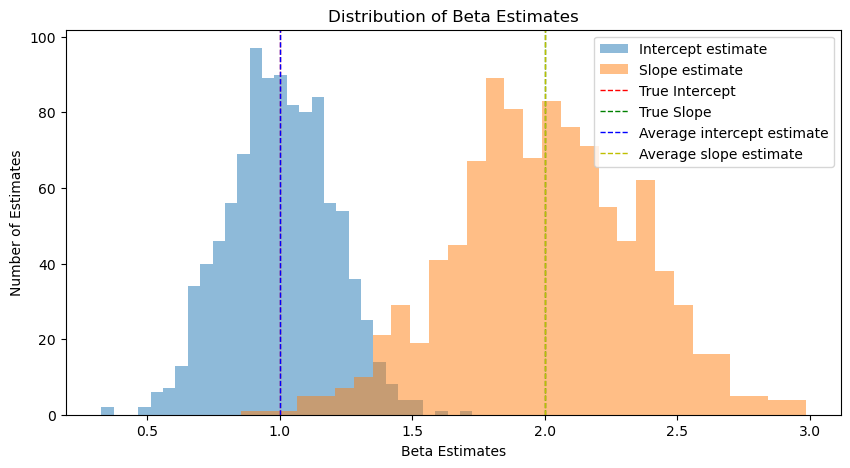

In [10]:
# instead of estimating the model on only one sample, let's estimate it 1000 times on 1000 different samples, and look at the distribution of the estimates

number_of_estimations = 1000 # number of times we will estimate the model
number_of_data_points = 100 # number of data points in each sample

def estimate_model(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

beta_estimates = np.zeros((number_of_estimations, 2)) # this will hold the estimates of beta for each sample

for i in range(number_of_estimations):
    X, y = generate_data(beta, n=number_of_data_points)
    beta_hat = estimate_model(X, y)
    beta_estimates[i, :] = beta_hat # store the estimates in the array

# now let's look at the distribution of the estimates
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1, 1, figsize=(10, 5))
plt.hist(beta_estimates[:, 0], bins=30, alpha=0.5, label='Intercept estimate')
plt.hist(beta_estimates[:, 1], bins=30, alpha=0.5, label='Slope estimate')

plt.axvline(x=beta[0], color='r', linestyle='dashed', linewidth=1, label='True Intercept')
plt.axvline(x=beta[1], color='g', linestyle='dashed', linewidth=1, label='True Slope')

plt.axvline(x=beta_estimates[:, 0].mean(), color='b', linestyle='dashed', linewidth=1, label='Average intercept estimate')
plt.axvline(x=beta_estimates[:, 1].mean(), color='y', linestyle='dashed', linewidth=1, label='Average slope estimate')

plt.legend()
plt.xlabel('Beta Estimates')
plt.ylabel('Number of Estimates')
plt.title('Distribution of Beta Estimates')

In [11]:
print("Mean of Intercept Estimates:", np.mean(beta_estimates[:, 0]))
print("Mean of Slope Estimates:", np.mean(beta_estimates[:, 1]))

print("Standard Deviation of Intercept Estimates:", np.std(beta_estimates[:, 0]))
print("Standard Deviation of Slope Estimates:", np.std(beta_estimates[:, 1]))

Mean of Intercept Estimates: 1.0012058382126536
Mean of Slope Estimates: 1.999875573995623
Standard Deviation of Intercept Estimates: 0.19611879217716896
Standard Deviation of Slope Estimates: 0.3460904405715875


Monte Carlo methods give us a great way to understand the distribution of the estimator, and how it changes with different parameters. Even though the esimates we get for the betas are never *exactly* correct. But what's important is that they are normally distributed around the true value, and we can use this to our advantage. This means that we can use linear regression to estimate the parameters of our model, and we can be confident that the estimates we get are close to the true values *on average*.

Note that the standard deviation of the estimators here is [almost] exactly the same as the standard error estimated by statsmodels. This is because the standard error is an estimate of the standard deviation of the estimator, and we are using a large number of samples to get a good estimate of the distribution.